**3. Para la siguiente configuración del subsuelo elabore el gráfico de dromocrónicas (gráficos t vs x en ambos sentidos) con disparos desde ambos extremos de la línea: Se tienen 3 medios formando una estructura de capas paralelas, con velocidad constante, y contactos buzando 11° en la dirección del experimento. La longitud total del arreglo es de 230m. V 1 = 850 m/s, V 2 = 1250 m/s, V 3 = 1800 m/s, h1= 8 m, h2 = 11 m. ¿Hay capas ocultas en el registro? (Explique)**

In [289]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


#d = [x for x in range(0, 245, 5)]


In [291]:
#Velocidades reales de las capas
v1 = 850
v2 = 1250
v3 = 1800
#Angulos de incidencia
i11=np.arcsin(v1/v2)
i12=np.arcsin(v1/v3)
i22=np.arcsin(v2/v3)
#buzamiento
buz=round(np.radians(i11),3)
#Pendientes de las rectas
m1=1/v1*1000
m2=1/v2*1000
m3=1/v3*1000

dist = []
for i in range(0, 231, 5):
    dist.append(i)
#Espesor hasta las fronteras
h1=8                          #Espesor de la izquierda FRONTERA 1
h2=11                         #Espesor de la izquierda FRONTERA 2
h1_d =h1+np.sin(buz)*dist[-1] #Espesor de la derecha   FRONTERA 1
h2_d =h2+np.sin(buz)*dist[-1] #Espesor de la derecha   FRONTERA 2


print('m1:',round(m1, 3))
print('m2:',round(m2, 3))
print('m2:',round(m3, 3))

m1: 1.176
m2: 0.8
m2: 0.556


In [343]:
#PERFIL PARA GRAFICAR
t_1p = []
x_1p = []
for i in range(0, 50, 5):
    t1 = i/v1
    t_1p.append(t1)
    x_1p.append(i)

t_2p = []
x_2p = []
for i in range(25, 75, 5):
    t2 = (((i*np.sin(i11+buz)))/v1)+((2*h1*np.cos(i11))/v1)
    t_2p.append(t2)
    x_2p.append(i)

t_3p = []
x_3p = []
for i in range(55, 200, 5):
    t3 = (((i*np.sin(i12+buz)))/v1)+((2*h1*np.cos(i12))/v1)+((2*h2*np.cos(i22))/v2)
    t_3p.append(t3)
    x_3p.append(i)


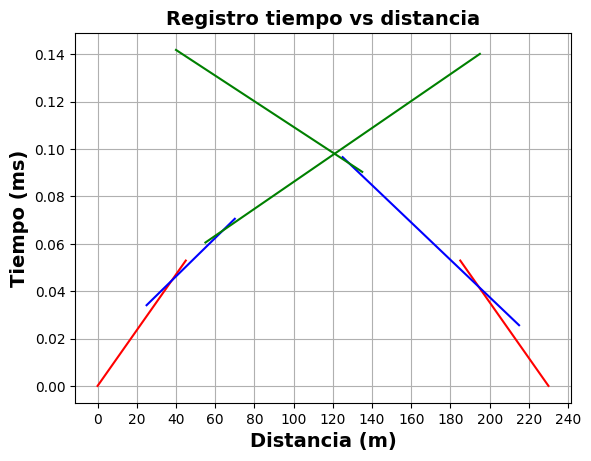

In [346]:
#CONTRAPERFIL PARA GRAFICAS
t_11c = []
x_11c = []
for j in range(185, 231, 5):
    t1c = j/v1
    t_11c.append(t1c)
    x_11c.append(j)
x_11cc = x_11c[::-1]

#RAYO CRITICAMENTE REFRACTADO EN FRONTERA 1
t_22c = []
x_22c = []
for j in range(125, 220, 5):
    t2c = (((j*np.sin(i11-buz)))/v1)+((2*h1*np.cos(i11))/v1)
    t_22c.append(t2c)
    x_22c.append(j)
x_22cc = x_22c[::-1]
#RAYO CRITICAMENTE REFRACTADO EN FRONTERA 2
t_33c = []
x_33c = []
for j in range(40, 140, 5):
    t3c = (((j*np.sin(i12-buz)))/v1)+((2*h1_d*np.cos(i12))/v1)+((2*h2_d*np.cos(i22))/v2)
    t_33c.append(t3c)
    x_33c.append(j)
x_33cc = x_33c[::-1]

#Espesor hasta la frontera 1
h1=8                       #Espesor de la izquierda
h1_d =h1+np.sin(buz)*dist[-1] #Espesor de la derecha

#Espesor hasta la frontera 2
h2=11                      #Espesor de la izquierda
h2_d =h2+np.sin(buz)*dist[-1] #Espesor de la derecha

plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')

plt.plot(x_1p,t_1p,label='Rayo Directo',  color='red')
plt.plot(x_2p,t_2p,label='Refracción Primera Frontera',  color='blue')
plt.plot(x_3p,t_3p,label='Refracción Segunda Frontera', color='green')


x1c=np.array(x_11cc)
y1c=-0.0011764705882352944*x1c+0.2705882352941177
plt.plot(x1c,y1c,label='Rayo Directo',  color='Red')

x2c=np.array(x_22cc)
y2c= -0.0007887188845168019*x2c+0.19520698317896673
plt.plot(x2c,y2c,label='Refracción Primera Frontera',  color='Blue',)

x3c=np.array(x_33cc)
y3c=-0.0005420275397656037*x3c+0.1635664112232278
plt.plot(x3c,y3c,label='Refracción Segunda Frontera', color='green')


#plt.legend()

plt.xticks(np.arange(0, 241, step=20))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))

plt.grid('true')

plt.show()

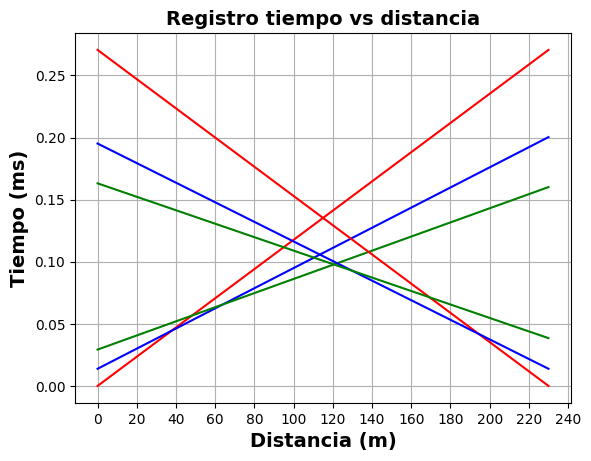

In [341]:
#PARA GRAFICAR SOLAMENTE
#PERFIL
t_1p = []
t_2p = []
t_3p = []
for i in range(0, 231, 5):
    t1 = i/v1
    t_1p.append(t1)
    t2 = (((i*np.sin(i11+buz)))/v1)+((2*h1*np.cos(i11))/v1)
    t_2p.append(t2)
    t3 = (((i*np.sin(i12+buz)))/v1)+((2*h1*np.cos(i12))/v1)+((2*h2*np.cos(i22))/v2)
    t_3p.append(t3)
    dist.append(i)
#CONTRAPERFIL
t_1c = []
t_2c = []
t_3c = []
dist = []
for i in range(0, 231, 5):
    t1 = i/v1
    t_1c.append(t1)
    t2 = (((i*np.sin(i11-buz)))/v1)+((2*h1*np.cos(i11))/v1)
    t_2c.append(t2)
    t3 = (((i*np.sin(i12-buz)))/v1)+((2*h1_d*np.cos(i12))/v1)+((2*h2_d*np.cos(i22))/v2)
    t_3c.append(t3)
    dist.append(i)
disc = dist[::-1]

#Espesor hasta la frontera 1
h1=8                       #Espesor de la izquierda
h1_d =h1+np.sin(buz)*dist[-1] #Espesor de la derecha

#Espesor hasta la frontera 2
h2=11                      #Espesor de la izquierda
h2_d =h2+np.sin(buz)*dist[-1] #Espesor de la derecha

plt.xlabel('Distancia (m)', weight='bold', fontsize='14')
plt.ylabel('Tiempo (ms)', weight='bold', fontsize='14')
plt.title('Registro tiempo vs distancia', weight='bold', fontsize='14')


plt.plot(dist,t_1p,label='Rayo Directo',  color='red')
plt.plot(dist,t_2p,label='Refracción Primera Frontera',  color='blue')
plt.plot(dist,t_3p,label='Refracción Segunda Frontera', color='green')

plt.plot(disc,t_1c,label='Rayo Directo',  color='Red')
plt.plot(disc,t_2c,label='Refracción Primera Frontera',  color='Blue',)
plt.plot(disc,t_3c,label='Refracción Segunda Frontera', color='green')


#plt.legend()

plt.xticks(np.arange(0, 241, step=20))
#plt.xticks((np.concatenate((np.arange(0, 5, step=10), np.arange(5, 140, step=10)))))

plt.grid('true')

plt.show()

In [322]:
from spicy import stats

x=np.array(x_11cc)

y1=np.array(t_11c)

y2=np.array(t_22c)

y3=np.array(t_33c)


# Realiza una regresión lineal para el primer par de datos (X,Y)
mf1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x_11cc,t_11c)
mf2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x_22cc,t_22c)
mf3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x_33cc,t_33c)


print('PERFIL')
print('Direct Wave:','md=',mf1,'             ','bp=',intercept1, r_value1, p_value1, std_err1)
print()
print('Critical refracted wave 1:', 'm1=',mf2, 'b1=',intercept2, r_value2, p_value2, std_err2)
print()
print('Critical refracted wave 2:', 'm2=',mf3, 'b2=',intercept3, r_value3, p_value3, std_err3)
print()

PERFIL
Direct Wave: md= -0.0011764705882352942               bp= 0.48235294117647065 -1.0 5.8534851285390365e-90 0.0

Critical refracted wave 1: m1= -0.0007887188845168019 b1= 0.2622480883628949 -0.9999999999999999 1.0891006269402914e-173 2.5057111856666234e-12

Critical refracted wave 2: m2= -0.0005420275397656037 b2= 0.1635664112232278 -0.9999999999999998 0.0 1.702747325297988e-12



In [297]:

mff, intercept1, r_value1, p_value1, std_err1 = stats.linregress(disc, t_1c)
print('Direct Wave:','md=',mf1,'             ','bp=',intercept1, r_value1, p_value1, std_err1)

Direct Wave: md= -0.0011764705882352942               bp= 0.2705882352941177 -1.0 0.0 0.0
